# Incertidumbre y Probabilidad

Muchos fenómenos naturales _son_ aleatorios, o al menos _parecen_ aleatorios, lo cual quiere decir que es imposible predecir sus estados futuros con total exactitud. Algunos ejemplos "triviales" incluyen tiros de dados o volados, pero también es posible identificar muchos ejemplos en otros dominios con aplicaciones más importantes. 

Algunos de ellos:

   * ¿Cuánto costarán los servicios básicos en 10 años?
   * ¿Quién ganará la siguiente elección presidencial?
   * ¿Qué personas serán infectadas por el virus y cuáles no?
    
Desde luego, está en nuestro interés responder dichas preguntas con la mayor precisión posible, pero parece que incluso las mejores respuestas tendrán (o deberían tener) cierto grado de incertidumbre.

Hay dos posiciones generales sobre la "naturaleza aleatoria" de estos y otros fenómenos:

   * Los fenómenos _no_ son aleatorios, pero nuestra ignorancia sobre su funcionamiento nos hace verlos como tales. En otras palabras, esta idea sugiere que si tuviéramos información perfecta sobre todas las variables relevantes podríamos predecir con total certeza el estado futuro del fenómeno.
    
   * Los fenómenos son _fundamentalmente_ aleatorios, es decir que incluso si conociéramos todas las variables relevantes y sus relaciones, y tuviéramos mediciones precisas de cada una, la mejor respuesta que podríamos generar incluye cierto grado de incertidumbre.
    
Esta discusión está lejos de ser resuelta, tanto en nuestra disciplina como en otros dominios científicos, pero al margen de si algún día alcanzamos dicha solución, al menos por ahora es _común_ modelar nuestro conocimiento sobre este tipo de escenarios con un **conjunto de herramientas que permitan cuantificar la incertidumbre** que tenemos sobre el fenómeno en cuestión.

Estas herramientas se conocen como _Teoría de Probabilidad_, y no son otra cosa más que la formalización de muchas intuiciones que utilizamos a diario para desenvolvernos en un mundo incierto.

### Distribuciones Marginales

Para motivar los ejemplos siguientes imaginen que su equipo o atleta favorit@ compite contra otras 7 entidades en un Torneo Élite. En general, es difícil predecir con exactitud en qué posición terminará su contendiente, e incluso si tuvieran que apostar a una sola posición, hay "algo" que dicha predicción dejaría fuera. Resulta más sensato, o más fidedigno respecto de nuestras creencias completas, especificar **qué tan probable es** que el equipo termine en **cada posición posible**. Esta distribución podría verse así:

| Posición: K | Probabilidad: P(K) |
|:---------:|:--------------:|
|1|0.06|
|2|0.22|
|3|0.02|
|4|0.08|
|5|0.12|
|6|0.14|
|7|0.16|
|8|0.20|

En este ejemplo la **variable aleatoria** $K$ es una función que enlista todos los **posibles resultados** en el "experimento" y puede tomar 8 valores:

$$K=\{K=1, K=2, K=3, K=4, K=5, K=6, K=7, K=8\},$$ 

lo cual también puede expresarse de manera resumida como $K\in\{1, 2, ..., 8\}$. En palabras: es _posible_ que nuestro equipo gane, que termine en segundo lugar, que quede en tercero, etcétera.

El otro componente es la **distribución de probabilidad**, $P(K)$, que es una función que asigna un **valor de probabilidad a cada posible valor de la variable aleatoria**. En el ejemplo, 

$$P(K)=P(K=k)=\{P(K=1)=0.06, P(K=2)=0.22, P(K=3)=0.02, ..., P(K=8)=0.20\}.$$

En palabras, una persona que tiene esta distribución como creencia sobre el resultado del orneo está diciendo que espera (en este orden) que su equipo termine en 2°, después que termine en 8°, después que termine en 7°, etcétera. 

Podemos utilizar la distribución no sólo para estudiar cada posible resultado por separado, sino también para cuantificar la incertidumbre sobre escenarios que involucran varios de ellos. Por ejemplo, para responder _¿qué tan probable es que el equipo termine en 1° **o** en 2°?_  basta con sumar las probabilidades correspondientes:

$$\begin{align}P(K=1 \cup K=2)&=P(K=1)+P(K=2)\\
                              &=0.06+0.22\\
                              &=0.28,
\end{align}$$

en donde el símbolo $\cup$ representa la unión entre conjuntos.

De manera similar, la probabilidad de que el equipo termine _después_ del 3° (i.e., que no consiga medalla):

$$\begin{align}P(3<K)&=P(K=4\cup K=5\cup K=6\cup K=7\cup K=8)\\
                     &=P(K=4)+P(K=5)+P(K=6)+P(K=7)+P(K=8)\\
                     &=0.08+0.12+0.14+0.16+0.20\\
                     &=0.70
\end{align}$$

O bien, la probabilidad de que termine _entre_ el 5° pero _antes_ del 8°:

$$\begin{align}P(5\leq K<8)&=P(K=5\cup K=6\cup K=7)\\
                           &=P(K=5)+P(K=6)+P(K=7)\\
                           &=0.12+0.14+0.16\\
                           &=0.42
\end{align}$$

Las respuestas a estas preguntas, y a muchas otras sobre posibles escenarios en el torneo, están contenidas en la distribución de probabilidad; en este sentido dicha función es la representación fundamental de la incertidumbre sobre el resultado del experimento. _Siempre_ es conveniente presentar la distribución gráficamente:



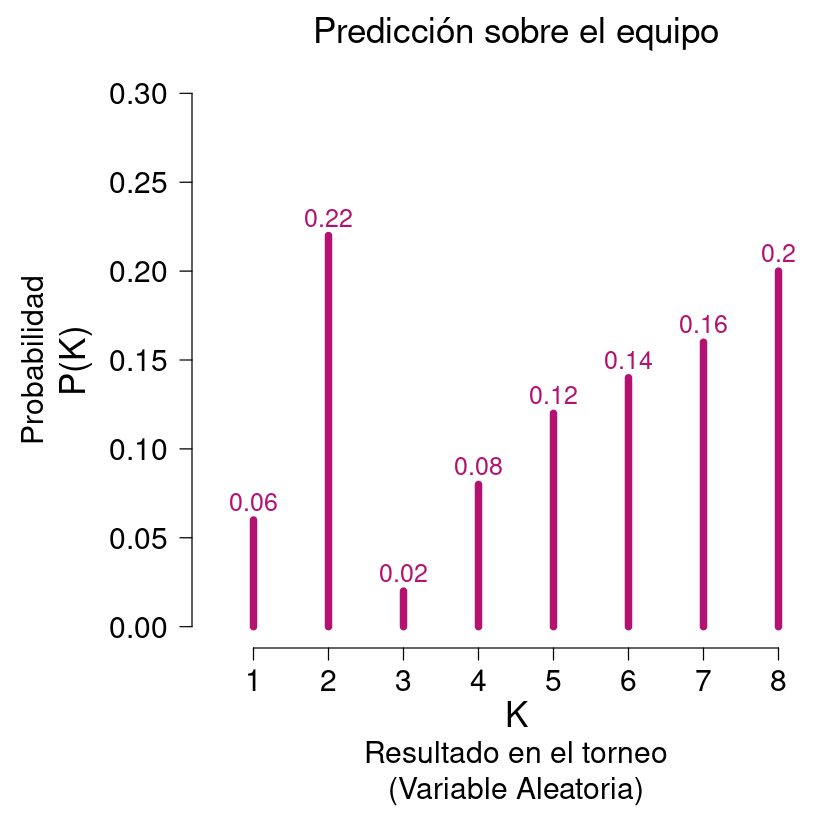

In [1]:
k <- 1:8
P_k <- c(0.06,0.22,0.02,0.08,0.12,0.14,0.16,0.20)
par(cex.axis=1.5,mar=c(8,8,3,0))
plot(k,P_k,axes=F,ann=F,type='h',lwd=6,ylim=c(0,0.3),col='#b41270',xlim=c(0.5,8.5))
text(k,P_k,paste(P_k),cex=1.25,adj=c(0.5,-.5),col='#b41270')
axis(1,at=1:8)
axis(2,las=1)
mtext('K',1,line=2.5,cex=1.75)
mtext('Resultado en el torneo\n(Variable Aleatoria)',1,line=5.5,cex=1.5)
mtext('Probabilidad',2,line=6,cex=1.5)
mtext('P(K)',2,line=4.25,cex=1.75)
mtext('Predicción sobre el equipo',3,line=1,cex=1.75)

Los valores de esta, y de cualquier otra distribución de probabilidad, están sujetos a tres restricciones: **a.** todos los valores de probabilidad deben de ser mayores que cero, y **b.** también tienen que ser menores que uno:

$$0\leq P(K=k)\leq1, \forall k,$$

en donde el símbolo $\forall$ se lee "para todos los (k)". Estas restricciones acotan la incertidumbre sobre cualquier evento en el mismo espacio numérico y por lo tanto permiten comparar los niveles de incertidumbre respecto de diferentes fenómenos _en la misma escala_. Además, esta acotación permite expresar (con el mismo conjunto de herramientas) escenarios en los que tenemos total certidumbre: $P(K=k)=0$ representa total certeza de que $K=k$ es un escenario imposible, y $P(K=k)=1$ representa total certeza de que el escenario $K=k$ es seguro.

Además, **c.** la suma de todos los valores de la distribución debe ser igual a uno:

$$\sum_{k}P(K=k)=1$$

En el ejemplo del Torneo:

$$\begin{align}
\sum_{k}P(K=k)&=P(K=1)+P(K=2)+\dots+P(K=8)\\
              &=0.06+0.22+0.02+0.08+0.12+0.14+0.16+0.20\\
              &=1
\end{align}$$

Esta tercera restricción es otra manera para decir que las posibilidades enlistadas en la variable aleatoria $K$ _agotan_ el espacio de posibilidades: como tenemos 8 competidores, tenemos _total certeza_ de que nuestro equipo terminará en 1°, o en 2°, o en 3°, o en cada uno de los 8 lugares posibles, i.e.:

$$\begin{align}
P(1\leq K\leq 8)&=1\\
P(K=1\cup K=2\cup\dots\cup K=8)&=1\\
P(K=1)+P(K=2)+\dots+P(K=8)&=1
\end{align}$$

Intuitivamente esta es la razón por la que las funciones que asignan probabilidad se refieren como "distribuciones": la idea es que hay un pastel de probabilidad de tamaño igual a 1 y la función especifica cómo se _distribuye_ ese pastel entre los escenarios posibles de la variable aleatoria.

### Distribuciones Conjuntas

Podemos extender el ejemplo del torneo considerando una segunda variable aleatoria: la presencia o ausencia de lluvia ($Z$) el día de la competencia. Esta nueva variable únicamente tiene dos valores posibles: o llueve ($Z=1$), o no llueve ($Z=0$). (Las etiquetas $0$ y $1$ son totalmente arbitrarias y en este caso se asignan para facilitar la notación siguiente.) Es decir,

$$Z\in\{0, 1\}$$

Incluir esta segunda variable aleatoria amplía nuestro espacio de predicciones (o lo vuelve más complejo) porque ahora podemos intentar predecir, un día antes del torneo, tanto el resultado del equipo, como la ocurrencia (o ausencia) de lluvia, y también **cada combinación posible** entre _cada_ posible resultado del equipo y _cada_ posibilidad en la ocurrencia de lluvia.

En otras palabras, cada entrada del _soporte_ de la distribución representa cada posible combinación entre el resultado del equipo (K) y la ocurrencia de lluvia (Z):

|K=k, Z=z| Z=0 | Z=1
|:-:|:---:|:---:|
|**K=1**|K=1, Z=0|K=1, Z=1|
|**K=2**|K=2, Z=0|K=2, Z=1|
|**K=3**|K=3, Z=0|K=3, Z=1|
|**K=4**|K=4, Z=0|K=4, Z=1|
|**K=5**|K=5, Z=0|K=5, Z=1|
|**K=6**|K=6, Z=0|K=6, Z=1|
|**K=7**|K=7, Z=0|K=7, Z=1|
|**K=8**|K=8, Z=0|K=8, Z=1|

La coma en la notación "$K=3,Z=0$" representa la intersección entre conjuntos y es otra forma de decir "$K=3$ **y** $Z=0$" (el equipo queda en tercero **y** no llueve). Utilizar la coma es la manera más común de expresar dicha conjunción, aunque también puede utilizarse $K=3\cap Z=0$.

Este nuevo "tipo" de variable aleatoria (o soporte) ya no tiene una, sino dos dimensiones, aunque nuevamente representa el espacio de posibilidades en el experimento. Nuevamente, podemos especificar qué tan probable es cada una de esas posibilidades. Como la distribución correspondiente asigna incertidumbre sobre posibles combinaciones (o conjunciones) entre las dos variables, se conoce como **distribución conjunta**:

|P(K=k, Z=z)| Z=0 | Z=1 |
|:-:|:---:|:---:|
|**K=1**|0.01|0.05|
|**K=2**|0.21|0.01|
|**K=3**|0.01|0.01|
|**K=4**|0.07|0.01|
|**K=5**|0.10|0.02|
|**K=6**|0.12|0.02|
|**K=7**|0.14|0.02|
|**K=8**|0.17|0.03|

Nuevamente, es conveniente graficar la distribución:

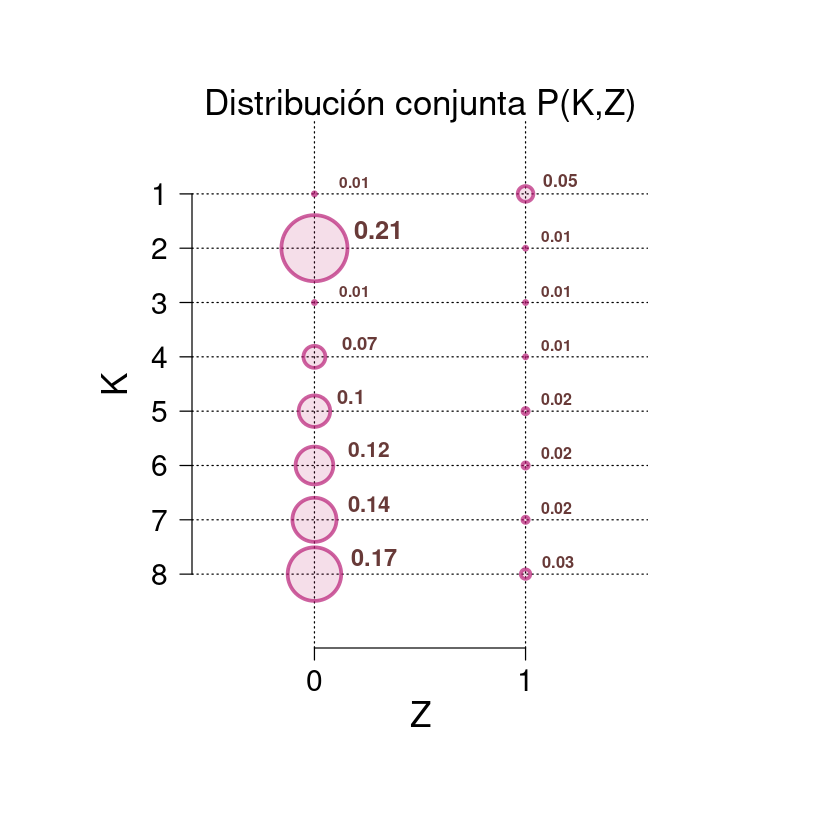

In [2]:
z <- 0:1
P_kz <- array(dim=c(length(k),length(z)))
P_kz[1,1] <- 0.01;P_kz[1,2] <- 0.05
P_kz[2,1] <- 0.21;P_kz[2,2] <- 0.01
P_kz[3,1] <- 0.01;P_kz[3,2] <- 0.01
P_kz[4,1] <- 0.07;P_kz[4,2] <- 0.01
P_kz[5,1] <- 0.10;P_kz[5,2] <- 0.02
P_kz[6,1] <- 0.12;P_kz[6,2] <- 0.02
P_kz[7,1] <- 0.14;P_kz[7,2] <- 0.02
P_kz[8,1] <- 0.17;P_kz[8,2] <- 0.03

par(cex.axis=1.5,mar=c(8,8,5,8))
plot(NULL,xlim=c(-.5,1.5),ylim=c(9,0),axes=F,ann=F)
axis(1,at=0:1);axis(2,at=8:1,las=1)
abline(v=0:1,lty='dotted')
abline(h=1:8,lty='dotted')
for(ki in 1:length(k)){
    for(zj in 1:length(z)){
        points(z[zj],k[ki],cex=P_kz[ki,zj]*35,pch=21,lwd=3,bg='#b70d6122',col='#b41270aa')
        text(z[zj],k[ki],paste(P_kz[ki,zj]),
             cex=0.75+P_kz[ki,zj]*2.5,
             col='#683a38',adj=c(c(-.8,-.5)[(z[zj]==1)+1],-.5),
             font=2)
    }
}
mtext('Z',1,line=2.5,cex=1.75)
mtext('K',2,line=2.5,cex=1.75)
mtext('Distribución conjunta P(K,Z)',3,cex=1.75)

Aunque la distribución conjunta está definida sobre dos dimensiones, sus valores están sujetos a las mismas restricciones: cada entrada debe estar acotada entre $0$ y $1$:
 
$$0\leq P(K=k,Z=z)\leq 1,\forall k,z,$$

y la suma de _toda_ distribución debe ser igual a $1$ porque las combinaciones entre ambas variables agotan el espacio de posibilidades:

$$\sum_{k}\sum_{z}P(K=k,Z=z)=1$$

La interpretación de la distribución conjunta es similar al caso de una dimensión. Por ejemplo, si queremos calcular qué tan probable es que [llueva y que el equipo quede en 6°] **o** que [no llueva y que el equipo termine en 3°]:

$$\begin{align}
P(K=6,Z=1\cup K=3,Z=0)&=P(K=6,Z=1)+P(K=3,Z=0)\\
                      &=0.02+0.01\\
                      &=0.03
\end{align}$$

Desde luego, dicha pregunta es un poco extraña y no resulta inmediato cómo podría ser útil. Sin embargo, utilizando los mismos principios podemos responder preguntas más sensatas, como _¿qué tan probable es que llueva?_ Esta posibilidad en la variable $Z$ puede expresarse como la unión de todos los casos del soporte conjunto que involucran combinaciones con $Z=1$:

$$\begin{align}
P(Z=1)&=P(K=1,Z=1\cup K=2,Z=1\cup K=3,Z=1 \cup \dots \cup K=8,Z=1)\\
      &=P(K=1,Z=1)+P(K=2,Z=1)+P(K=3,Z=1)+ \dots +P(K=8,Z=1)\\
      &=0.05+0.01+0.01+0.01+0.02+0.02+0.02+0.03\\
      &=0.17
\end{align}$$

Es decir, para calcular la _probabilidad total_ de que llueva hay que sumar sobre la región de la conjunta que involucra $Z=1$, pero a través de los valores de la _otra_ variable aleatoria:

$$P(Z=1)=\sum_{k}P(K=k,Z=1)$$

Utilizando el mismo principio podemos calcular la probabilidad total de que no llueva:

$$\begin{align}
P(Z=0)&=\sum_{k}P(K=k,Z=0)\\
      &=P(K=1,Z=0)+P(K=2,Z=0)+\dots+P(K=8,Z=0)\\
      &=0.01+0.21+0.01+0.07+0.10+0.12+0.14+0.17\\
      &=0.83
\end{align}$$

Noten que el resultado sobre los valores en $Z$ refleja que éstos agotan todas sus posibilidades (o llueve, o no llueve):

$$\begin{align}
\sum_{z}P(Z=z)&=P(Z=0)+P(Z=1)\\
              &=0.83+0.17\\
              &=1
\end{align}$$

En otras palabras, la distribución **marginal** sobre $Z$ está contenida en la distribución **conjunta**:

$$P(Z=z)=\sum_{k}P(K=k,Z=z)$$

Podemos calcular la marginal sobre $K$ de manera similar, aunque sumando a través de la otra variable:

$$P(K=k)=\sum_{z}P(K=k,Z=z).$$

Resolviendo para algunos valores de $K$:

$$\begin{align}
P(K=1)&=\sum_{z}P(K=1,Z=z)\\
      &=P(K=1,Z=0)+P(K=1,Z=1)\\
      &=0.01+0.05\\
      &=0.06\\
P(K=2)&=\sum_{z}P(K=2,Z=z)\\
      &=P(K=2,Z=0)+P(K=2,Z=1)\\
      &=0.21+0.01\\
      &=0.22\\\\
      \vdots\\\\
P(K=8)&=\sum_{z}P(K=8,Z=z)\\
      &=P(K=8,Z=0)+P(K=8,Z=1)\\
      &=0.17+0.03\\
      &=0.20\\
\end{align}$$

Es decir, si conocemos la distribución conjunta en automático conocemos la incertidumbre marginal sobre **cada** variable que la conforma. Intuitivamente, las distribuciones definidas sobre cada variable se llaman "marginales" porque se calculan sumando la conjunta a través de (o hacia) cierto margen:

|P(K=k, Z=z)| Z=0 | Z=1 |P(**K**)|
    |:-:|:---:|:---:|:---:|
|**K=1**|0.01|0.05|**0.06**|
|**K=2**|0.21|0.01|**0.22**|
|**K=3**|0.01|0.01|**0.02**|
|**K=4**|0.07|0.01|**0.08**|
|**K=5**|0.10|0.02|**0.12**|
|**K=6**|0.12|0.02|**0.14**|
|**K=7**|0.14|0.02|**0.16**|
|**K=8**|0.17|0.03|**0.20**|
|**P(Z**)|**0.87**|**0.13**|

### Distribuciones Condicionales

La distribución conjunta entre $K$ y $Z$ puede interpretarse como cierto **estado de conocimiento**: representa la incertidumbre que tenemos sobre ambas variables _un día antes_ de la competencia. De manera similar, las distribuciones marginales en dicha distribución representan la incertidumbre sobre cada variable un día antes del torneo. Específicamente, un día antes del torneo estamos esperando con mayor probabilidad el resultado "el equipo queda en 2° y no llueve"; además, estamos esperando los resultados marginales "el equipo queda en 2°", y aparte "no llueve", en caso de que nos interese apostar a cada variable por separado.

Dicho estado de conocimiento puede modificarse (drásticamente) la mañana del torneo, sobre todo si unos minutos antes de la competencia empieza a llover. En este escenario la variable $Z$ deja de ser una variable no observada porque la hemos medido y _ya conocemos_ su estado sin incertidumbre: $Z=1$.

En tanto que ya sabemos _qué pasó_ respecto de $Z$ podemos utilizar ese conocimiento para actualizar la predicción sobre la otra variable, $K$, todavía no observada. La idea es que la **observación** $Z=1$ nos indica con certeza _en qué región de la conjunta nos encontramos_ respecto de $Z$, y por lo tanto podemos estudiar la incertidumbre restante sobre $K$ **en ese espacio reducido** de la distribución conjunta.

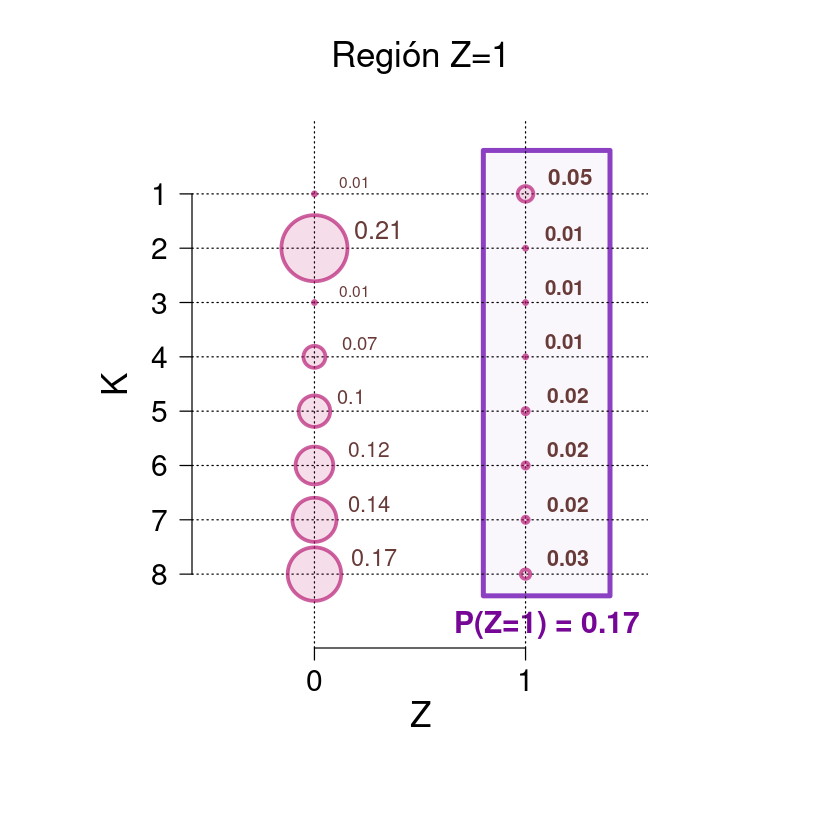

In [3]:
par(cex.axis=1.5,mar=c(8,8,5,8))
plot(NULL,xlim=c(-.5,1.5),ylim=c(9,0),axes=F,ann=F)
polygon(x=c(0.8,1.4,1.4,0.8),y=c(8.4,8.4,0.2,0.2),
       col='#7012b408',border='#7012b4cc',lwd=4)
text(1.1,9,paste('P(Z=1) = ',sum(P_kz[,2]),sep=''),col='#760796',font=2,cex=1.5,adj=c(0.5,.2))
axis(1,at=0:1);axis(2,at=8:1,las=1)
abline(v=0:1,lty='dotted')
abline(h=1:8,lty='dotted')
for(ki in 1:length(k)){
    for(zj in 1:length(z)){
        points(z[zj],k[ki],cex=P_kz[ki,zj]*35,pch=21,lwd=3,bg='#b70d6122',col='#b41270aa')
        text(z[zj],k[ki],paste(P_kz[ki,zj]),
             cex=c(0.75,1)[(z[zj]==1)+1]+P_kz[ki,zj]*2.5,
             col='#683a38',adj=c(c(-.8,-.5)[(z[zj]==1)+1],-.5),
             font=c(1,2)[(z[zj]==1)+1])
    }
}
mtext('Z',1,line=2.5,cex=1.75)
mtext('K',2,line=2.5,cex=1.75)
mtext('Región Z=1',3,cex=1.75,line=2)

Para calcular la incertidumbre restante sobre $K$ después de observar $Z=1$ es necesario reescalar las entradas de la conjunta que involucran $Z=1$ respecto del margen $P(Z=1)$. En palabras, vamos a calcular _¿qué porcentaje de 0.17 es 0.05?, ¿qué porcentaje de 0.17 es 0.01?_, etcétera. Este reescalamiento se conoce como _condicionalización_, y la distribución resultante sobre $K$ se conoce como **distribución condicional sobre K dado Z=1**:

$$P(K=k|Z=1)=\frac{P(K=k,Z=1)}{P(Z=1)}$$

Resolviendo para cada cada valor de $K$:

$$\begin{align}
P(K=1|Z=1)&=\frac{P(K=1,Z=1)}{P(Z=1)}\\
          &=\frac{0.05}{0.17}\\
          &\approx0.294\\\\
P(K=2|Z=1)&=\frac{P(K=2,Z=1)}{P(Z=1)}\\
          &=\frac{0.01}{0.17}\\
          &\approx0.059\\
\end{align}$$

En tanto que las entradas de la conjunta $P(K=2,Z=1)=P(K=3,Z=1)=P(K=4,Z=1)=0.01$, tendremos el mismo resultado al calcular las condicionales $P(K=2|Z=1)=P(K=3|Z=1)=P(K=4|Z=1)\approx0.059$.

$$\begin{align}
P(K=5|Z=1)&=\frac{P(K=5,Z=1)}{P(Z=1)}\\
          &=\frac{0.02}{0.17}\\
          &\approx0.118,\\\\
\end{align}$$

que también será el resultado para $P(K=6|Z=1)$ y $P(K=7|Z=1)$,

$$\begin{align}
P(K=8|Z=1)&=\frac{P(K=8,Z=1)}{P(Z=1)}\\
          &=\frac{0.03}{0.17}\\
          &\approx0.176\\\\
\end{align}$$

Presentando la distribución $P(K|Z=1)$ completa (aunque redondeada a tres posiciones decimales):

| K | P(K\|Z=1) |
|:---:|:---:|
|1|0.294|
|2|0.059|
|3|0.059|
|4|0.059|
|5|0.118|
|6|0.118|
|7|0.118|
|8|0.176|

En tanto que esta incertidumbre "actualizada" (como consecuencia de _observar_ $Z$) está definida sobre las mismas posibilidades en $K$, que agotan el espacio de posibilidades, la distribución condicional también debe cumplir:

$$\begin{align}
\sum_{k}P(K=k|Z=1)&=P(K=1|Z=1)+P(K=2|Z=1)+\dots+P(K=8|Z=1)\\
                  &\approx0.294+0.059+0.059+0.059+0.118+0.118+0.118+0.176\\
                  &\approx1  
\end{align}$$

Graficando la distribución condicional $P(K|Z=1)$ y comparándola con la marginal $P(Z)$:

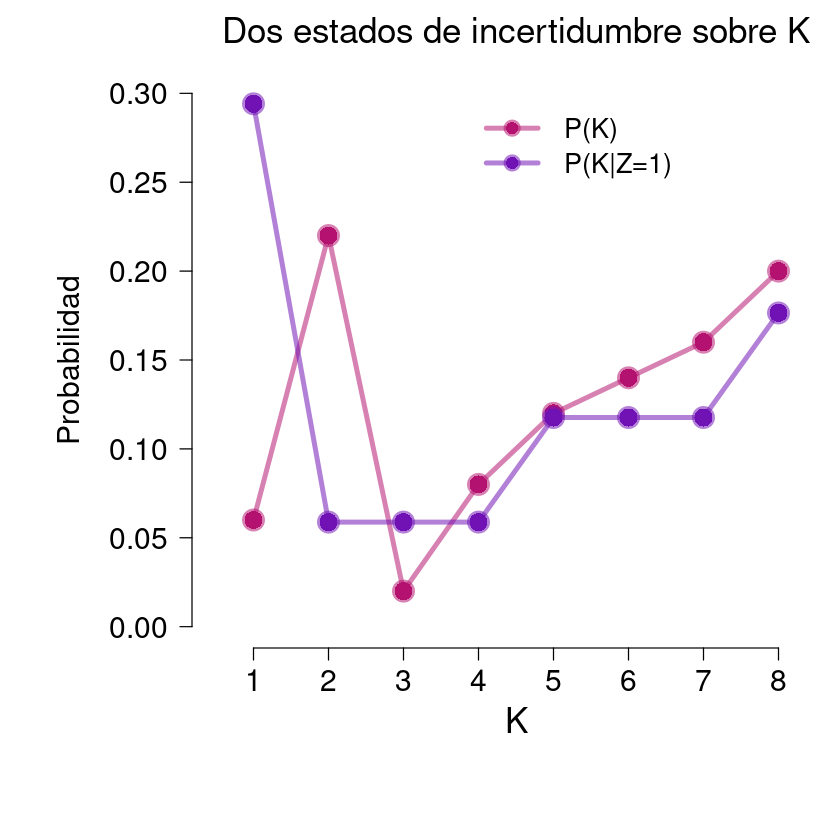

In [4]:
P_k_D_z1 <- P_kz[,2]/sum(P_kz[,2])

par(cex.axis=1.5,mar=c(8,8,3,0))
plot(NULL,axes=F,ann=F,ylim=c(0,0.3),xlim=c(0.5,8.5))
points(k,P_k,type='o',pch=21,cex=2,lwd=4,bg='#b41270',col='#b4127088')
points(k,P_k_D_z1,type='o',pch=21,cex=2,lwd=4,bg='#7012b4',col='#7012b488')
axis(1,at=1:8)
axis(2,las=1)
mtext('K',1,line=2.75,cex=1.75)
mtext('Probabilidad',2,line=4.5,cex=1.5)
mtext('Dos estados de incertidumbre sobre K',3,line=1,cex=1.75)
legend(4,0.3,yjust=1,
      legend=c('P(K)','P(K|Z=1)'),lwd=4,pch=21,
      pt.bg=c('#b41270','#7012b4'),
      col=c('#b4127088','#7012b488'),cex=1.35,
      box.lty='blank')

La comparación gráfica entre el conocimiento sobre $K$ antes y después de observar $Z$ vuelve evidentes las diferencias y las similitudes entre ambas distribuciones. En concreto, una vez que el modelo observa lluvia espera que nuestro equipo gane la competencia, a diferencia de la expectativa que teníamos cuando no sabíamos si llovería o no. Por otra parte, hay algunos casos de $K$ igualmente probables tanto antes como después de observar $Z$ (p.ej., $K=5$), y también hay _regiones_ de la distribución que se comportan más o menos igual en ambos estados de incertidumbre ($4\leq K\leq8$). Habiendo señalado los particulares de este ejemplo, la idea general es que la incertidumbre sobre cierta variable puede cambiar mucho, cambiar poco, o no cambiar en absoluto, como efecto de observar _alguna_ otra variable en la conjunta.

Noten que en la expresión:

$$P(K=k|Z=1)=\frac{P(K=k,Z=1)}{P(Z=1)},$$

el denominador es la _probabilidad total_ de $P(Z=1)$, que previamente calculamos como:

$$P(Z=1)=\sum_{k}P(K=k,Z=1)$$

Por lo tanto, también es posible (y común) expresar la distribución condicional como:

$$P(K=k|Z=1)=\frac{P(K=k,Z=1)}{\sum_{k}P(K=k,Z=1)},$$

que permite interpretar la distribución condicional como cierta región en la distribución conjunta reescalada respecto de su probabilidad total, o su propia suma.

Desde luego, también podríamos calcular la incertidumbre condicional sobre $K$ en caso de que **no** observemos lluvia, reescalando los valores en la conjunta que involucran $Z=0$ respecto de la probabilidad total de dicho escenario. En otras palabras, la distribución condicional sobre $K$ dado cualquier valor de $Z$ se define como:

$$P(K=k|Z=z)=\frac{P(K=k,Z=z)}{\sum_{k}P(K=k,Z=z)}$$

Utilizando el mismo modelo conjunto podemos actualizar la incertidumbre del sistema en la otra dirección: imaginen que torneo finalmente tiene lugar y nuestro equipo queda en 3°; registramos el resultando en un almanaque. Varios años después cierta meteoróloga interesada en el clima de nuestra época, **a.** primero descubre nuestro modelo conjunto y calcula la distribución marginal sobre $Z$ correspondiente:

$$P(Z)=\{P(Z=0)=0.83,P(Z=1)=0.17\}$$

Esta primera distribución representa la mejor aproximación a la ocurrencia de lluvia desde su perspectiva, en tanto que no existen registros sobre la ocurrencia de lluvia en el lugar del torneo. Sin embargo, pocos días después la científica **b.** encuentra el almanaque y descubre el resultado de nuestro equipo, es decir, tiene acceso a la información $K=3$. ¿Qué debe creer ahora sobre la ocurrencia o ausencia de lluvia aquel día?

Para resolver esta pregunta utilizamos el mismo principio: la incertidumbre actualizada sobre $Z$ se calcula como el reescalamiento de la región conjunta que involucra $K=3$ respecto de su propia suma. Gráficamente:

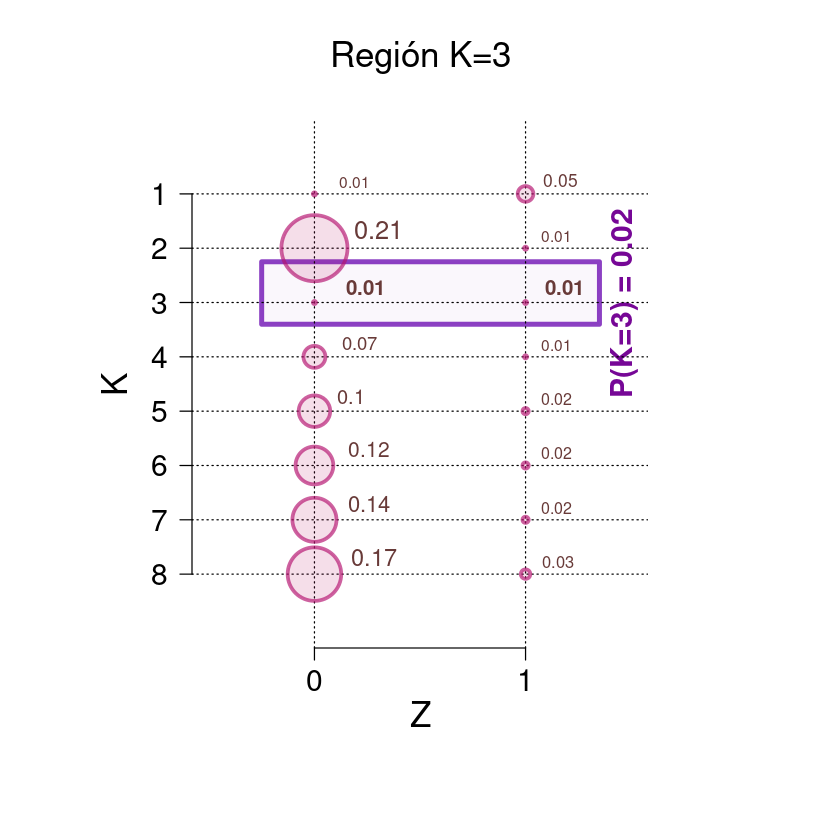

In [5]:
par(cex.axis=1.5,mar=c(8,8,5,8))
plot(NULL,xlim=c(-.5,1.5),ylim=c(9,0),axes=F,ann=F)
polygon(x=c(-.25,1.35,1.35,-.25),y=c(2.25,2.25,3.4,3.4),
       col='#7012b408',border='#7012b4cc',lwd=4)
text(1.35,3,paste('P(K=3) = ',sum(P_kz[3,]),sep=''),col='#760796',font=2,cex=1.5,adj=c(0.5,1.5),srt=90)
axis(1,at=0:1);axis(2,at=8:1,las=1)
abline(v=0:1,lty='dotted')
abline(h=1:8,lty='dotted')
for(ki in 1:length(k)){
    for(zj in 1:length(z)){
        points(z[zj],k[ki],cex=P_kz[ki,zj]*35,pch=21,lwd=3,bg='#b70d6122',col='#b41270aa')
        text(z[zj],k[ki],paste(P_kz[ki,zj]),
             cex=c(0.75,1)[(k[ki]==3)+1]+P_kz[ki,zj]*2.5,
             col='#683a38',adj=c(c(-.8,-.5)[(z[zj]==1)+1],-.5),
             font=c(1,2)[(k[ki]==3)+1])
    }
}
mtext('Z',1,line=2.5,cex=1.75)
mtext('K',2,line=2.5,cex=1.75)
mtext('Región K=3',3,cex=1.75,line=2)

Calculando la condicional $P(Z|K=3)$:

$$\begin{align}
P(Z|K)&=\frac{P(K,Z)}{\sum_{z}P(K,Z)}\\\\
P(Z|K=3)&=\frac{P(K=3,Z)}{\sum_{z}P(K=3,Z)}\\\\
        &=\frac{P(K=3,Z)}{P(K=3,Z=0)+P(K=3,Z=1)}\\\\
        &=\frac{P(K=3,Z)}{0.01+0.01}\\\\
        &=\frac{P(K=3,Z)}{0.02}\\\\
P(Z=0|K=3)&=\frac{P(K=3,Z=0)}{0.02}\\
          &=\frac{0.01}{0.02}\\\\
          &=0.5\\\\
P(Z=1|K=3)&=\frac{P(K=3,Z=1)}{0.02}\\
          &=\frac{0.01}{0.02}\\\\
          &=0.5\\          
\end{align}$$

Es decir, una vez que la meteoróloga descubre el resultado de nuestro equipo concluye que es igualmente probable que haya llovido o que no haya llovido el día de la competencia, creencias que son diferentes a sus expectativas antes de conocer el estado de $K$. Comparando gráficamente ambos estados de incertidumbre sobre $Z$:

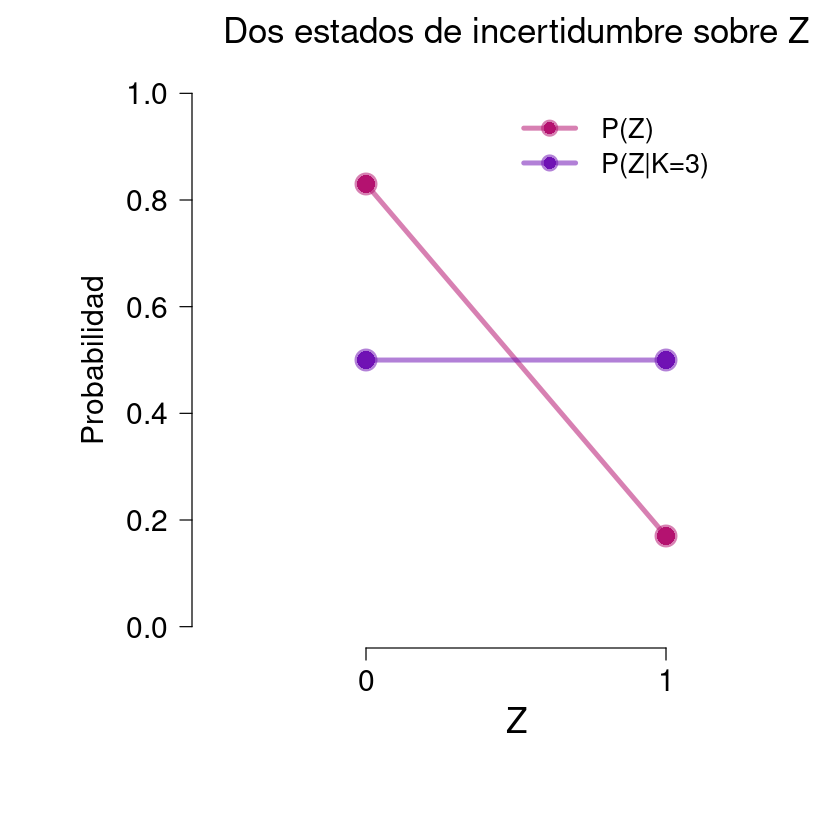

In [6]:
P_z <- c(sum(P_kz[,1]),sum(P_kz[,2]))
P_z_D_k3 <- P_kz[3,]/sum(P_kz[3,])

par(cex.axis=1.5,mar=c(8,8,3,0))
plot(NULL,axes=F,ann=F,ylim=c(0,1),xlim=c(-.5,1.5))
points(z,P_z,type='o',pch=21,cex=2,lwd=4,bg='#b41270',col='#b4127088')
points(z,P_z_D_k3,type='o',pch=21,cex=2,lwd=4,bg='#7012b4',col='#7012b488')
axis(1,at=z)
axis(2,las=1)
mtext('Z',1,line=2.75,cex=1.75)
mtext('Probabilidad',2,line=3.5,cex=1.5)
mtext('Dos estados de incertidumbre sobre Z',3,line=1,cex=1.75)
legend(.5,1,yjust=1,
      legend=c('P(Z)','P(Z|K=3)'),lwd=4,pch=21,
      pt.bg=c('#b41270','#7012b4'),
      col=c('#b4127088','#7012b488'),cex=1.35,
      box.lty='blank')

## Ejercicios

Utilizando el modelo conjunto del torneo, calcula: 

1. la distribución condicional $P(K|Z=0)$, es decir, las predicciones **sobre el resultado del equipo** si observamos que no llueve,
2. la distribución condicional $P(Z|K=1)$, es decir, la incertidumbre **sobre lluvia** si la meteoróloga hubiera descubierto que nuestro equipo ganó el torneo.

Considerando el siguiente modelo conjunto entre las variables $Q$ y $H$:

|P(Q,H) | H=1 | H=2 | H=3 | H=4 |
|:-----:|:---:|:---:|:---:|:---:|
|**Q=1**|3/80 |15/80|9/80 |3/80 |
|**Q=2**|8/80 |15/80|13/80|4/80 |
|**Q=3**|5/80 |2/80 |2/80 |1/80 |

3. calcula la distribución marginal sobre _cada_ variable,
4. calcula la distribución condicional $P(Q|H=2)$, y discute brevemente las diferencias con la marginal correspondiente, y
5. calcula la distribución condicional $P(H|Q=3)$, y describe brevemente las diferencias con la incertidumbre marginal.